🔬 Input data has 49949 cells and 23335 genes
🔗 Matching reference genes in the model
🧬 5746 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


Set of variables used:
 - n_pcs: 40
 - n_neighbors: 10
 - resolution: 0.5



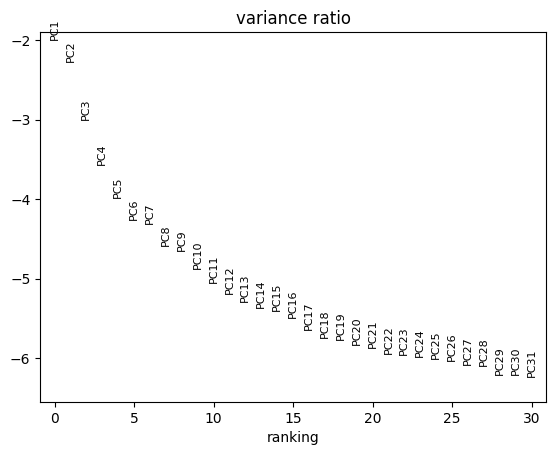

... storing 'celltypist_major' as categorical


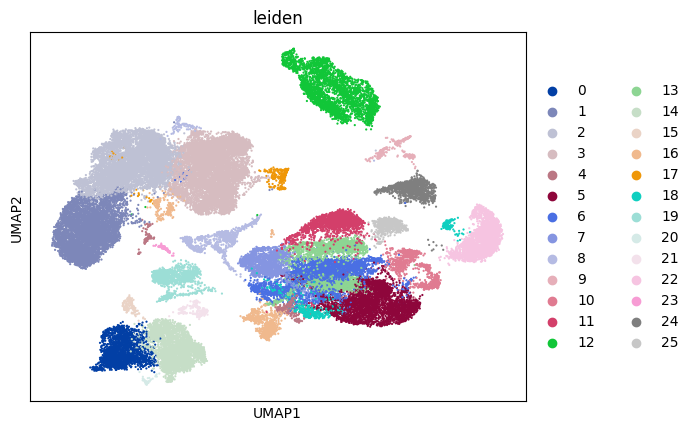

Ranking genes grouped by 'leiden' using method 'wilcoxon'...

Top 3 marker genes per 'leiden' cluster:
Cluster 0: IGLC2, CD79A, MS4A1
Cluster 1: IL7R, RPS12, RPL32
Cluster 2: CCL5, IL32, NKG7
Cluster 3: GNLY, NKG7, GZMB
Cluster 4: HLA-DPA1, HLA-DRA, HLA-DPB1
Cluster 5: IER3, NAMPT, MAFB
Cluster 6: AC020656.1, LYZ, FCN1
Cluster 7: AIF1, FCGR3A, CDKN1C
Cluster 8: HBA2, HBA1, HBB
Cluster 9: NAMPT, CSF3R, S100A8
Cluster 10: RETN, S100A8, S100A12
Cluster 11: IFI44L, IFITM3, TYMP
Cluster 12: PF4, PPBP, NRGN
Cluster 13: AC020656.1, TNFAIP2, CSF3R
Cluster 14: IGKC, CD79A, MS4A1
Cluster 15: CD79A, MS4A1, LINC00926
Cluster 16: IFI27, IFITM3, S100A8
Cluster 17: STMN1, PCLAF, TYMS
Cluster 18: TNFAIP2, TYMP, AIF1
Cluster 19: IL32, PRF1, B2M
Cluster 20: HBB, HBA2, HBA1
Cluster 21: JCHAIN, MZB1, IGKC
Cluster 22: S100A8, NCF1, MNDA
Cluster 23: LTB, TRAC, IL7R
Cluster 24: FOS, MNDA, DUSP1
Cluster 25: ISG15, IFITM3, IFI6
AnnData object with n_obs × n_vars = 49949 × 4000
    obs: 'sample_label', 'group',

In [8]:
%reset -f
import psutil
process = psutil.Process()
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_agent import (
    filter_cells,
    normalize_log_transform,
    filter_lowqc_cells,
    save_high_var_gene,
    pca_and_plot_umap,
    get_top_marker_genes,
    annotate_with_celltypist
)
# Assume this function is provided, since sc.pl.inspection doesn't exist
def quick_inspect(adata):
    print(adata)

# Load the data
adata = sc.read_h5ad('/Users/silviachen/Documents/Software/new_sca_agent/SCAagent/covid_adata.h5ad')

# Quality control and filtering
filter_cells(adata)
adata = filter_lowqc_cells(adata)

# Normalization and log transformation
normalize_log_transform(adata)

annotate_with_celltypist(adata, model_path='Immune_All_Low.pkl')
# Save high variance genes
adata = save_high_var_gene(adata)

# PCA and compute UMAP
pca_and_plot_umap(adata)

# Get top marker genes for each cluster
get_top_marker_genes(adata)

# Save the processed data
adata.write('adata_preprocessed.h5ad')

# Inspect adata structure
quick_inspect(adata)


In [5]:
%reset -f
import psutil
process = psutil.Process()
# Import necessary libraries and functions
import scanpy as sc
from utils_agent import assign_cell_categories, assign_cell_subtype, annotate_with_celltypist
import pandas as pd

# Load the AnnData object
adata = sc.read_h5ad("adata_preprocessed.h5ad")

# Define cell type annotation based on gene markers
cluster_to_category = {
    "0": "B cell",
    "1": "T cell",
    "2": "NK cell",
    "3": "NK cell",
    "4": "Dendritic cell",
    "5": "Monocyte",
    "6": "Monocyte",
    "7": "Monocyte",
    "8": "Erythroid",
    "9": "Neutrophil",
    "10": "Neutrophil",
    "11": "Monocyte",
    "12": "Platelet",
    "13": "Monocyte",
    "14": "B cell",
    "15": "B cell",
    "16": "Monocyte",
    "17": "Proliferating cell",
    "18": "Monocyte",
    "19": "NK cell",
    "20": "Erythroid",
    "21": "Plasma cell",
    "22": "Neutrophil",
    "23": "T cell",
    "24": "Monocyte",
    "25": "Monocyte"
}

# Assign cell categories
adata = assign_cell_categories(adata, cluster_to_category=cluster_to_category)

# Inspect the data based on the assigned categories
ct_table = pd.crosstab(adata.obs["cell_category"], adata.obs["group"])
print(ct_table)

# Define subtypes based on differentially expressed genes
cluster_to_subtype = {
    "0": "Naive B cell",
    "1": "CD4+ T cell",
    "2": "Cytotoxic NK cell",
    "3": "Cytotoxic NK cell",
    "4": "cDCs",
    "5": "Classical Monocyte",
    "6": "Classical Monocyte",
    "7": "Non-classical Monocyte",
    "8": "Immature Erythroid",
    "9": "Neutrophil",
    "10": "Activated Neutrophil",
    "11": "Intermediate Monocyte",
    "12": "Platelet",
    "13": "Classical Monocyte",
    "14": "Memory B cell",
    "15": "Plasma B cell",
    "16": "Inflammatory Monocyte",
    "17": "Proliferating Myeloid",
    "18": "Classical Monocyte",
    "19": "Effector NK cell",
    "20": "Mature Erythroid",
    "21": "Plasmablast",
    "22": "Activated Neutrophil",
    "23": "CD8+ T cell",
    "24": "Intermediate Monocyte",
    "25": "Inflammatory Monocyte"
}

# Assign subtypes
assign_cell_subtype(adata, cluster_to_subtype=cluster_to_subtype)

# Annotate using celltypist
annotate_with_celltypist(adata, model_path='Immune_All_Low.pkl')

# Save the annotated AnnData object
adata.write("adata_annotated.h5ad")


⚠️ Warning: invalid expression matrix, expect all genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 49949 cells and 4000 genes
🔗 Matching reference genes in the model
🧬 1584 features used for prediction
⚖️ Scaling input data


group                Flu  Normal  nCoV
cell_category                         
B cell               289    1552  3485
Dendritic cell        12      84   199
Erythroid            392      92   534
Monocyte            2041    5242  8179
NK cell             2789    5580  6918
Neutrophil          2307       7  1124
Plasma cell           13      30   173
Platelet              92     166  2763
Proliferating cell    11      33   226
T cell               304    1897  3415


🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 20


KeyboardInterrupt: 

In [4]:
%reset -f
import psutil
process = psutil.Process()
import anndata as ad
import pandas as pd
import logging
from utils_agent import get_deg_full, get_gene_by_disease, get_filtered_gene_list

# Suppressing specific logging messages
logging.getLogger('fontTools.subset').setLevel(logging.ERROR)

# Load the annotated data
adata = ad.read_h5ad('adata_annotated.h5ad')

# Define disease subtypes for further study, excluding the control or normal group
to_study = ["Flu", "nCoV"]

# Save a copy of adata for each disease subtype along with the control type
adata_Flu = adata[adata.obs['group'].isin(['Normal', 'Flu'])].copy()
adata_nCoV = adata[adata.obs['group'].isin(['Normal', 'nCoV'])].copy()

# Determine cell types that are worth further analysis based on the crosstab result
cell_types_to_analyze = ["B cell", "NK cell", "Monocyte", "T cell"]  # Examples, to be verified

# Loop over each sub adata and get potential gene set for each disease type
for curr_adata, curr_group in zip([adata_Flu, adata_nCoV], ["Flu", "nCoV"]):
    potential_gene_set = get_gene_by_disease(adata, curr_adata, curr_group, cell_types_to_analyze, control_type="Normal")
    
    # Get filtered list of gene symbols
    filtered_gene_list = get_filtered_gene_list(adata, list(potential_gene_set.keys()))
    filtered_gene_dict = {gene: potential_gene_set[gene] for gene in filtered_gene_list}
    
    # Print the current group name along with the filtered potential gene dictionary
    print(curr_group, filtered_gene_dict)


                Gene_set                                  Term Overlap  \
178  KEGG_mouse_2019.gmt                  Salmonella infection    9/78   
109  KEGG_mouse_2019.gmt                         Leishmaniasis    8/67   
99   KEGG_mouse_2019.gmt               IL-17 signaling pathway    9/91   
200  KEGG_mouse_2019.gmt  Toll-like receptor signaling pathway    9/99   
108  KEGG_mouse_2019.gmt                         Legionellosis    7/58   
..                   ...                                   ...     ...   
28   KEGG_mouse_2019.gmt                         Breast cancer   1/147   
151  KEGG_mouse_2019.gmt     Phospholipase D signaling pathway   1/149   
90   KEGG_mouse_2019.gmt              Hepatocellular carcinoma   1/171   
22   KEGG_mouse_2019.gmt                         Axon guidance   1/180   
135  KEGG_mouse_2019.gmt                Olfactory transduction  1/1133   

          P-value  Adjusted P-value  Odds Ratio  Combined Score  \
178  6.035229e-07          0.000133   11.275

Flu {'NFKBIA': {'celltypist': {'top_celltypist_major': 5, 'values': {'HSC/MPP': 1.0, 'Treg(diff)': 1.0, 'Migratory DCs': 1.0, 'Megakaryocyte precursor': 1.0, 'ILC3': 1.0}}, 'subtype': {'top_subtype': 5, 'values': {'CD8+ T cell': 0.9937, 'Activated Neutrophil': 0.9551, 'Plasma B cell': 0.9545, 'cDCs': 0.9356, 'Classical Monocyte': 0.9333}}, 'DEG': [{'cell_type': 'B cell', 'pval': 8.441622998256774e-60, 'score': 16.309547424316406, 'logFC': 1.5325815677642822, 'pval_adj': 1.1255497331009033e-56}, {'cell_type': 'T cell', 'pval': 3.900552591454031e-47, 'score': 14.41951847076416, 'logFC': 1.436505675315857, 'pval_adj': 2.6003683943026873e-44}], 'TF enrichment': [{'Term': 'Leishmaniasis', 'adj_pval': 0.00016553469701552462}, {'Term': 'IL-17 signaling pathway', 'adj_pval': 0.00016553469701552462}, {'Term': 'Toll-like receptor signaling pathway', 'adj_pval': 0.0002517302918178149}, {'Term': 'Legionellosis', 'adj_pval': 0.0003708512392162223}, {'Term': 'TNF signaling pathway', 'adj_pval': 0.00

                Gene_set                                       Term Overlap  \
32   KEGG_mouse_2019.gmt  Chagas disease (American trypanosomiasis)   8/103   
13   KEGG_mouse_2019.gmt                                  Apoptosis   9/141   
62   KEGG_mouse_2019.gmt     Fluid shear stress and atherosclerosis   9/143   
41   KEGG_mouse_2019.gmt                          Colorectal cancer    7/88   
91   KEGG_mouse_2019.gmt                    IL-17 signaling pathway    7/91   
..                   ...                                        ...     ...   
17   KEGG_mouse_2019.gmt                                  Autophagy   1/130   
133  KEGG_mouse_2019.gmt                  Oxidative phosphorylation   1/134   
193  KEGG_mouse_2019.gmt             Ubiquitin mediated proteolysis   1/138   
122  KEGG_mouse_2019.gmt    Neuroactive ligand-receptor interaction   2/348   
129  KEGG_mouse_2019.gmt                     Olfactory transduction  1/1133   

      P-value  Adjusted P-value  Odds Ratio  Combin

nCoV {'NFKBIA': {'celltypist': {'top_celltypist_major': 5, 'values': {'HSC/MPP': 1.0, 'Treg(diff)': 1.0, 'Migratory DCs': 1.0, 'Megakaryocyte precursor': 1.0, 'ILC3': 1.0}}, 'subtype': {'top_subtype': 5, 'values': {'CD8+ T cell': 0.9937, 'Activated Neutrophil': 0.9551, 'Plasma B cell': 0.9545, 'cDCs': 0.9356, 'Classical Monocyte': 0.9333}}, 'DEG': [{'cell_type': 'B cell', 'pval': 4.670380005117938e-57, 'score': 15.919100761413574, 'logFC': 0.7288379669189453, 'pval_adj': 3.73630400409435e-54}, {'cell_type': 'NK cell', 'pval': 0.0, 'score': 46.44164276123047, 'logFC': 1.817118525505066, 'pval_adj': 0.0}, {'cell_type': 'Monocyte', 'pval': 2.0549305852907723e-189, 'score': 29.355133056640625, 'logFC': 0.9632934331893921, 'pval_adj': 4.1098611705815445e-187}, {'cell_type': 'T cell', 'pval': 1.1347660654656e-27, 'score': 10.901416778564453, 'logFC': 0.5124874711036682, 'pval_adj': 2.5217023677013333e-25}], 'TF enrichment': [{'Term': 'Chagas disease (American trypanosomiasis)', 'adj_pval': 0